In [ ]:
#https://www.youtube.com/watch?v=MpIi4HtCiVk&list=LL&index=4&t=52s&ab_channel=AlexTheAnalyst

#https://towardsdatascience.com/cleaning-text-data-with-python-b69b47b97b76

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcdefaults
import pandas as pd
pd.set_option('display.max_columns', None)
#df = pd.read_csv('twitter_violence.csv')
#df.head()

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Changing the created_at variable to datetime 

In [41]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [42]:
df['created_at'].unique()

<DatetimeArray>
['2021-02-18 19:34:05+00:00', '2021-02-18 19:34:04+00:00',
 '2021-02-18 19:34:03+00:00', '2021-02-18 19:34:02+00:00',
 '2021-02-18 19:34:01+00:00', '2021-02-18 19:34:00+00:00',
 '2021-02-18 19:33:59+00:00', '2021-02-18 19:33:58+00:00',
 '2021-02-18 19:33:57+00:00', '2021-02-18 19:33:56+00:00',
 ...
 '2021-02-18 19:31:06+00:00', '2021-02-18 19:31:05+00:00',
 '2021-02-18 19:31:04+00:00', '2021-02-18 19:31:03+00:00',
 '2021-02-18 19:31:02+00:00', '2021-02-18 19:31:01+00:00',
 '2021-02-18 19:31:00+00:00', '2021-02-18 19:30:59+00:00',
 '2021-02-18 19:30:58+00:00', '2021-02-18 19:30:57+00:00']
Length: 156, dtype: datetime64[ns, UTC]

In [43]:
df['minute_created'] = df['created_at'].dt.minute

In [44]:
df['minute_created'].value_counts()

32    96
31    96
33    89
30    10
34     9
Name: minute_created, dtype: int64

In [45]:
scatter = df[['minute_created', 'retweet_count']]

In [46]:
scatter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   minute_created  300 non-null    int64
 1   retweet_count   300 non-null    int64
dtypes: int64(2)
memory usage: 4.8 KB


<AxesSubplot:xlabel='minute_created', ylabel='retweet_count'>

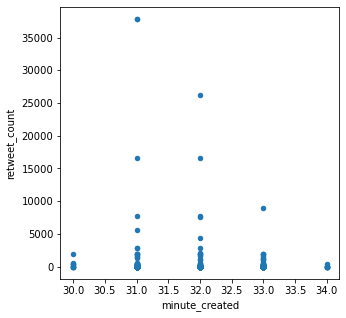

In [47]:
scatter.plot(x='minute_created' , y='retweet_count', kind='scatter', figsize=(5,5))

# Cleaning the text column

In [48]:
##Changing to lower case
df['text'] = df['text'].apply(lambda x: x.lower())

In [49]:
##Removing any unicode characters
df['text'] = df['text'].apply(lambda x: x.encode('ascii', 'ignore').decode())

In [50]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
df['text'] = df['text'].apply(lambda x:' '.join([word for word in x.split() if word not in stop]))

In [52]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

In [53]:
df['text'] = df['text'].apply(punctuation_removal)

In [54]:
sentences = []

for word in df['text']:
    sentences.append(word)

In [55]:
lines = list()

for line in sentences:
    w = line.split()
    for i in w:
        lines.append(i)

In [56]:
##Stemming reduces the word to it's base word
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

In [57]:
stem = []
for word in lines:
    stem.append(s_stemmer.stem(word))

In [58]:
from nltk.probability import FreqDist
df2 = pd.DataFrame(stem)

df2 = df2[0].value_counts()

freq = FreqDist()


for word in df2:
    
    freq[word] +=1


In [59]:
freq

FreqDist({1: 1184, 2: 274, 3: 132, 4: 68, 5: 29, 6: 20, 7: 18, 8: 14, 9: 11, 10: 6, ...})

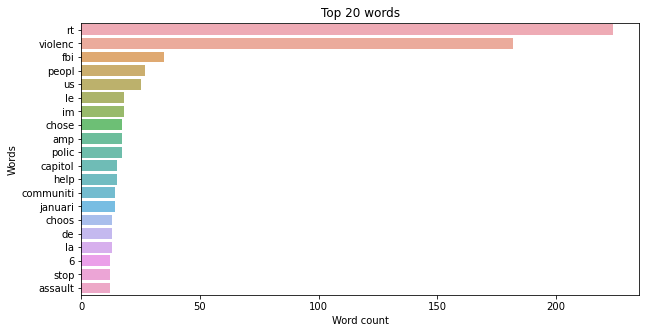

In [70]:
# rt - retweet
Top20 = df2[:20]

plt.figure(figsize=(10,5))
sns.barplot(Top20.values, Top20.index, alpha=0.8)
plt.title('Top 20 words')
plt.ylabel('Words')
plt.xlabel('Word count')
plt.show()